In our case, the $NaYF_4$ crystal structure is hexagonal, so the coordination number is 12. To make it easier to get started, we firstly study the simple cubic crystal structure, and implement the required functions with Python step by step, finally promote to other cases.

1. Create 3D uniform grids space with $10\times 10 \times 10$ points, then randomly assign these points with A, B, C to indicate sensitizer($Yb^{3+}$), emitter($Tm^{3+}$), and others. Considering sensitizers, emitters have different energy levels, so we also introduce `value` for A(0 and 1 for ground state and excited state, respectively) and B(2,3,4,5,6) for B(ground state, 1st, 2nd, 3rd excited states, etc.) While the value of C is always `None`

In [4]:
import numpy as np

# Set seed for reproducibility
np.random.seed()

# Define the number of points and dimensions
n_points = 1000  # 10*10*10

# Dimensions for the 3D grid
# hexagonal
n, m, p = 10, 10, 10

# Generate grid points with 1 nm spacing
# array([0., 1., 2., 3., 4....9])

x_coords = np.linspace(0, n-1, n)
y_coords = np.linspace(0, m-1, m)
z_coords = np.linspace(0, p-1, p)

# Create grid
X, Y, Z = np.meshgrid(x_coords, y_coords, z_coords, indexing='ij')
coords = np.array([X.flatten(), Y.flatten(), Z.flatten()]).T

# Assign point types based on the specified distributions
types = ['A'] * 200 + ['B'] * 100 + ['C'] * 700
np.random.shuffle(types)

# Assign values based on the point types
values = []
for t in types:
    if t == 'A':
        values.append(np.random.choice([0, 1], p=[0.85, 0.15]))  ### here, because of absorbation rate of Yb, set the rate manually as 0.85 and 0.15

    elif t == 'B':
        values.append(2)  # All type B points have value 2
    else:
        values.append(None)  # No associated value for type C





# Combine the information into a list of tuples
points = [[t, tuple(coord), v] for t, coord, v in zip(types, coords, values)]


Ws=7.6*10**3

for point in points:
  _, _, value = point
  if value==1:
    point.append({'p0':Ws})


In [5]:
coords

array([[0., 0., 0.],
       [0., 0., 1.],
       [0., 0., 2.],
       ...,
       [9., 9., 7.],
       [9., 9., 8.],
       [9., 9., 9.]])

In [6]:
for point in points[:20]:
    print(point)

['B', (0.0, 0.0, 0.0), 2]
['A', (0.0, 0.0, 1.0), 0]
['A', (0.0, 0.0, 2.0), 0]
['A', (0.0, 0.0, 3.0), 0]
['A', (0.0, 0.0, 4.0), 0]
['C', (0.0, 0.0, 5.0), None]
['C', (0.0, 0.0, 6.0), None]
['C', (0.0, 0.0, 7.0), None]
['C', (0.0, 0.0, 8.0), None]
['B', (0.0, 0.0, 9.0), 2]
['B', (0.0, 1.0, 0.0), 2]
['C', (0.0, 1.0, 1.0), None]
['A', (0.0, 1.0, 2.0), 1, {'p0': 7600.0}]
['C', (0.0, 1.0, 3.0), None]
['C', (0.0, 1.0, 4.0), None]
['C', (0.0, 1.0, 5.0), None]
['A', (0.0, 1.0, 6.0), 0]
['C', (0.0, 1.0, 7.0), None]
['B', (0.0, 1.0, 8.0), 2]
['B', (0.0, 1.0, 9.0), 2]


#### the total distributation of the system. Define a function, once we input the configuration, it would print the histogram of numbers, values of points A and B.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# once we input the configurations, then we can get the total information of the system

def plot_distributions(points):


    # Create a list of all types and values for easier plotting
    all_types = [point[0] for point in points]
    all_values_A = [point[2] for point in points if point[0] == 'A']
    all_values_B = [point[2] for point in points if point[0] == 'B']



    plt.figure(figsize=(15, 5))

    # Plotting distribution of A, B, C using bar plot

    # 1 row, 3 columns, 1st plot

    plt.subplot(1, 3, 1)
    labels, counts = np.unique(all_types, return_counts=True)


    bars = plt.bar(labels, counts, color=['blue', 'pink', 'green'], width=0.4)
    plt.ylabel('Count',fontsize=18)
    plt.title('Distribution of three types',fontsize=18)
    plt.xticks(labels, ['Sensitizers', 'Emitters', 'Others'],fontsize=16)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 5, yval, ha='center', va='bottom')

    # Plotting value distribution for type A using histogram

    # 1 row, 3 columns, 2nd plot
    plt.subplot(1, 3, 2)
    counts, bins, patches = plt.hist(all_values_A, bins=[0, 1, 2], align='left', rwidth=0.4, color='blue')
    plt.ylabel('Count',fontsize=18)
    plt.title('Value distribution for sensitizers',fontsize=18)
    plt.xticks([0, 1], ['0(Ground state)', '1(Excited state)'],fontsize=16)
    for count, bin, patch in zip(counts, bins, patches):
        plt.text(bin + 0.01, count + 1, int(count), ha='center', va='bottom')

    # Plotting value distribution for type B using histogram


    # 1 row, 3 columns, 3rd plot
    plt.subplot(1, 3, 3)
    counts, bins, patches = plt.hist(all_values_B, bins=[2, 3, 4, 5, 6, 7], align='left', rwidth=0.4, color='pink')

    plt.ylabel('Count',fontsize=18)
    plt.title('Value distribution for emitters',fontsize=18)
    plt.xticks([2, 3, 4, 5, 6], ['G', '1st', '2nd', '3rd', '4th'],fontsize=16)
    for count, bin, patch in zip(counts, bins, patches):
        plt.text(bin + 0.01, count + 1, int(count), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming points list is defined already
# plot_distributions(points)


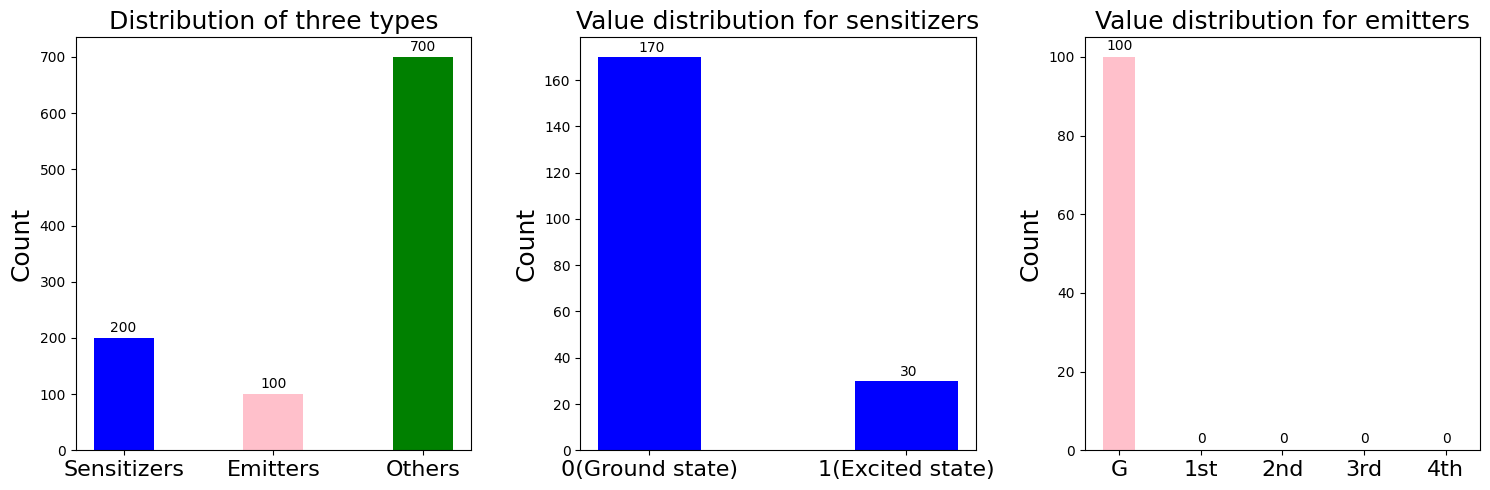

In [8]:
plot_distributions(points)

## distributation of 1000 points in 3D space

In [9]:
import plotly.graph_objects as go

def plot_3d_points_with_plotly(points):
    # Separate points based on their type (A or B)
    points_A = [point for point in points if point[0] == 'A']
    points_B = [point for point in points if point[0] == 'B']

    # Extract coordinates and values for points of type A

    x_A = [point[1][0] for point in points_A]
    y_A = [point[1][1] for point in points_A]
    z_A = [point[1][2] for point in points_A]

    values_A = [point[2] for point in points_A]

    # Extract coordinates and values for points of type B
    x_B = [point[1][0] for point in points_B]
    y_B = [point[1][1] for point in points_B]
    z_B = [point[1][2] for point in points_B]
    values_B = [point[2] for point in points_B]

    # Create 3D scatter plots
    trace_A = go.Scatter3d(x=x_A, y=y_A, z=z_A, mode='markers+text',
                           marker=dict(size=6, color='blue', opacity=0.8),
                           text=values_A, textposition='top center')

    trace_B = go.Scatter3d(x=x_B, y=y_B, z=z_B, mode='markers+text',
                           marker=dict(size=6, color='pink', opacity=0.8),
                           text=values_B, textposition='top center')

    # Combine plots and set layout
    data = [trace_A, trace_B]
    layout = go.Layout(margin=dict(l=0, r=0, b=0, t=0))
    fig = go.Figure(data=data, layout=layout)

    # Display the figure
    fig.show()

plot_3d_points_with_plotly(points)


## Since we already achieved the visualization of the system at the beginning, then for $Yb^{3+}$,find the six nearest neighbors for a given point in a cubic 3D space. For $Tm^{3+}$, we don't care about their neighbors, but determine their possible transition with the location of a random number in that interval

(Note: surfaces, edges, corners. If the target point inhabits in one of six surface(x=0 or x=9, or y=0 or y=9, or z=0, or z=0), print the point in the surface. if the target point inhabits in one of eight corners, then also print the point in the corner. if the target point inhabits in one of 12 edges, then also print the point in the edge.)



### We start from the firstly excited points A(sensitizers $Yb^{3+}$), these excited Yb retrieved from original total list: `points`

In [ ]:
import random

# Step 1: Filter out 'A' points with value 1
excited_state_A_i = [[i,point] for i,point in enumerate(points) if point[0] == 'A' and point[2] == 1]

excited_state_A = [point for point in points if point[0] == 'A' and point[2] == 1]

In [ ]:
excited_state_A_i

[[36, ['A', (0.0, 3.0, 6.0), 1, {'p0': 7600.0}]],
 [40, ['A', (0.0, 4.0, 0.0), 1, {'p0': 7600.0}]],
 [59, ['A', (0.0, 5.0, 9.0), 1, {'p0': 7600.0}]],
 [92, ['A', (0.0, 9.0, 2.0), 1, {'p0': 7600.0}]],
 [134, ['A', (1.0, 3.0, 4.0), 1, {'p0': 7600.0}]],
 [164, ['A', (1.0, 6.0, 4.0), 1, {'p0': 7600.0}]],
 [188, ['A', (1.0, 8.0, 8.0), 1, {'p0': 7600.0}]],
 [194, ['A', (1.0, 9.0, 4.0), 1, {'p0': 7600.0}]],
 [205, ['A', (2.0, 0.0, 5.0), 1, {'p0': 7600.0}]],
 [229, ['A', (2.0, 2.0, 9.0), 1, {'p0': 7600.0}]],
 [250, ['A', (2.0, 5.0, 0.0), 1, {'p0': 7600.0}]],
 [345, ['A', (3.0, 4.0, 5.0), 1, {'p0': 7600.0}]],
 [348, ['A', (3.0, 4.0, 8.0), 1, {'p0': 7600.0}]],
 [390, ['A', (3.0, 9.0, 0.0), 1, {'p0': 7600.0}]],
 [423, ['A', (4.0, 2.0, 3.0), 1, {'p0': 7600.0}]],
 [452, ['A', (4.0, 5.0, 2.0), 1, {'p0': 7600.0}]],
 [475, ['A', (4.0, 7.0, 5.0), 1, {'p0': 7600.0}]],
 [480, ['A', (4.0, 8.0, 0.0), 1, {'p0': 7600.0}]],
 [509, ['A', (5.0, 0.0, 9.0), 1, {'p0': 7600.0}]],
 [521, ['A', (5.0, 2.0, 1.0), 1, {'

### One import feature is that if we update the excited Yb3+ from type value==1 to type value==0(decay to ground level), then this point in original list `points` will also be updated.

### check one excited Yb:

In [ ]:
excited_state_A_i[0][1][2]

1

### update its value from 1 to 0:

In [ ]:
excited_state_A_i[0][1][2]-=1

In [ ]:
excited_state_A_i[0][1][2]

0

### the original one would also be updated:

In [ ]:
points[36]

['A', (0.0, 3.0, 6.0), 0, {'p0': 7600.0}]

In [ ]:
excited_state_A

[['A', (0.0, 3.0, 6.0), 1, {'p0': 7600.0}],
 ['A', (0.0, 4.0, 0.0), 1, {'p0': 7600.0}],
 ['A', (0.0, 5.0, 9.0), 1, {'p0': 7600.0}],
 ['A', (0.0, 9.0, 2.0), 1, {'p0': 7600.0}],
 ['A', (1.0, 3.0, 4.0), 1, {'p0': 7600.0}],
 ['A', (1.0, 6.0, 4.0), 1, {'p0': 7600.0}],
 ['A', (1.0, 8.0, 8.0), 1, {'p0': 7600.0}],
 ['A', (1.0, 9.0, 4.0), 1, {'p0': 7600.0}],
 ['A', (2.0, 0.0, 5.0), 1, {'p0': 7600.0}],
 ['A', (2.0, 2.0, 9.0), 1, {'p0': 7600.0}],
 ['A', (2.0, 5.0, 0.0), 1, {'p0': 7600.0}],
 ['A', (3.0, 4.0, 5.0), 1, {'p0': 7600.0}],
 ['A', (3.0, 4.0, 8.0), 1, {'p0': 7600.0}],
 ['A', (3.0, 9.0, 0.0), 1, {'p0': 7600.0}],
 ['A', (4.0, 2.0, 3.0), 1, {'p0': 7600.0}],
 ['A', (4.0, 5.0, 2.0), 1, {'p0': 7600.0}],
 ['A', (4.0, 7.0, 5.0), 1, {'p0': 7600.0}],
 ['A', (4.0, 8.0, 0.0), 1, {'p0': 7600.0}],
 ['A', (5.0, 0.0, 9.0), 1, {'p0': 7600.0}],
 ['A', (5.0, 2.0, 1.0), 1, {'p0': 7600.0}],
 ['A', (5.0, 6.0, 0.0), 1, {'p0': 7600.0}],
 ['A', (5.0, 9.0, 3.0), 1, {'p0': 7600.0}],
 ['A', (6.0, 1.0, 3.0), 1, {'p0'

In [ ]:
len(excited_state_A)

34

In [ ]:
qualified_points=excited_state_A

### Since intrinsic decay and up-conversion are mutual compete process, so we use the normalized probability as corresponding weight. The weights are determined by published data in `Nature, Dayong Jin`

In [ ]:
t=1 # time step, in the unit of 1 microsecond, 1 us=10**6 s

# from Nature
t1 = 132 # lifetime of Yb excited level, so the intrinsic decay rate Ws=1/t1=7.6*10**3/s(we have to consider the inherent relation)
t3 = 156 # 1st Tm, 6.4*10**3/s
t4 = 56 # 2nd Tm, 1.8*10**4/s
t5 = 71 # 3rd Tm, 1.4*10**4/s
t6 = 313 # 4th Tm
lifetime_Yb_Tm=[t1, t3, t4, t5, t6]

## $Yb^{3+}$ .Based on Nature, we firstly don't consider the transition from an excited Yb3+ to ground Yb. So, there are only four choice plus one more choice(spontaneous decay) for an excited Yb to transfer its energy to its neighbors or just decay to ground.

In [ ]:
# for 1st, Yb
# Ws, c1,c2,c3,c4

Ws=7.6*10**3 # here, Ws is not spontaneous rate, but transfer E from 1st Yb to ground Yb
c1=6.23*10**4
c2=5.7*10**4
c3=7.4*10**4
c4=5.2*10**3

#stay_Yb1=math.exp(-Ws*t)
#spon_decay=1-math.exp(-Ws*t)

Yb1=[Ws, c1,c2,c3,c4]


Yb1_sum=sum(Yb1)
normalized_Yb1 = [p/Yb1_sum for p in Yb1]
normalized_Yb1

[0.036875303250849104,
 0.3022804463852499,
 0.2765647743813683,
 0.35904900533721495,
 0.025230470645317808]

### $Tm^{3+}$, ground state. $Yb^{3+}$ need to consider its neighbors, and update the target neighbor. $Tm^{3+}$ don't need to find its neighbors, only state update itself.

In [ ]:
# for ground Tm
# k31, k41, k51

# choice

k31=1.5*10**5
k41=1.75*10**5
k51=4.8*10**5
#....


Tm0=[k31, k41, k51]
Tm0_sum=sum(Tm0)
normalized_Tm0 = [p/Tm0_sum for p in Tm0]
normalized_Tm0

[0.18633540372670807, 0.21739130434782608, 0.5962732919254659]

### $Tm^{3+}$, 1st excited state. Only has two choice: spontaneous decay, or not.

In [ ]:
import math
# for 1st Tm
# W2, decay or not
# p_decay=1-exp(-t/T)

normalized_Tm1 = [1 - math.exp(-t)]
normalized_Tm1

[0.6321205588285577]

### $Tm^{3+}$, 2nd state. Spontaneous decay: b32, b31. Non-radiative emission: k31. Stay.

In [ ]:
# for 2nd Tm
# W3, c3, k31


W3=1.8*10**4
b31=0.27
b32=0.73
#c3=7.4*10**4
k31=1.5*10**5
#....


Tm2=[W3*b31, W3*b32, k31]
Tm2_sum=sum(Tm2)
normalized_Tm2 = [p/Tm2_sum for p in Tm2]
normalized_Tm2

[0.02892857142857143, 0.07821428571428571, 0.8928571428571429]

### $Tm^{3+}$, 3rd state. Spontaneous decay: b43, b42, b41, Non-radiative emission: k41. Stay.

In [ ]:
# for 3rd Tm
# W4, c4, k41


W4=1.4*10**4
b43=0.58
b42=0.24
b41=0.18
#c4=5.2*10**3
k41=1.75*10**5
#....


Tm3=[W4*b43, W4*b42, W4*b41, k41]
Tm3_sum=sum(Tm3)
normalized_Tm3 = [p/Tm3_sum for p in Tm3]
normalized_Tm3

[0.04296296296296296,
 0.017777777777777778,
 0.013333333333333334,
 0.9259259259259259]

### $Tm^{3+}$, 4th state. Spontaneous decay: b54, b53, b52, b51. Non-radiative emission: k51. Stay.

In [ ]:
# for 4th Tm
# W5, k51

W5=3.2*10**3
b54=0.33
b53=0.20
b52=0.23
b51=0.24
k51=4.8*10**5
#....

Tm4=[W5*b54, W5*b53, W5*b52, W5*b51, k51]
Tm4_sum=sum(Tm4)
normalized_Tm4 = [p/Tm4_sum for p in Tm4]
normalized_Tm4

[0.002185430463576159,
 0.0013245033112582781,
 0.0015231788079470199,
 0.0015894039735099338,
 0.9933774834437086]

### For this co-dopant system, sensitizer and emitter at different excited level have different choice. We calculate the normalizaed prbability based on Dayong Jin paper: `Nature`.

### Although, we don't know the exact parameters, but under the same system and internal and external conditions, we may assume these parameters vary within a small range, and by doing normalization, we can reduce the error. For example:

#### notebility

In [ ]:
normalized_Yb_Tm=[normalized_Yb1, normalized_Tm0, normalized_Tm1, normalized_Tm2, normalized_Tm3, normalized_Tm4]

normalized_Yb_Tm

[[0.036875303250849104,
  0.3022804463852499,
  0.2765647743813683,
  0.35904900533721495,
  0.025230470645317808],
 [0.18633540372670807, 0.21739130434782608, 0.5962732919254659],
 [0.6321205588285577],
 [0.02892857142857143, 0.07821428571428571, 0.8928571428571429],
 [0.04296296296296296,
  0.017777777777777778,
  0.013333333333333334,
  0.9259259259259259],
 [0.002185430463576159,
  0.0013245033112582781,
  0.0015231788079470199,
  0.0015894039735099338,
  0.9933774834437086]]

In [ ]:
len(normalized_Yb_Tm) # 1st Yb, ground Tm, 1st Tm, 2nd Tm, 3rd Tm, 4th Tm

6

### 1. $Yb^{3+}$

### Because all possible interactions determined by the nearest neighbors, so we have to label the probability according to these neighbors, then these labels can be further used with the random number we are going to generate later.

### 2. $Tm^{3+}$

### If the input point is B(say, 1st excited), then we don't care about its neighbors, all possible transtions happen inside the point B

In [ ]:
### For Yb, set the probability according to neighbor type and its energy level, this function determines which interactions could happen according to the reference point's neighbors' state(type, energy level)
### Essentially the probability determined by quantum mechanics.

### if target point is A, then in the following function, we call this add_tag function to add tag to its neighbors


def add_tags_to_neighbor(neighbor_info):
    #type_, _, value = neighbor_info,the input variable: first element is type, third element is value

    #tag = {'pc':0,'p0':0.8,'p1':0.,'p2':0.2,'p3':0.2,'p4':0.4,'p5':0.5,'p6':0.6,'p7':0.7}
    tag={'pc':0,'p0':normalized_Yb_Tm[0][0],'p1':0,'p2':normalized_Yb_Tm[0][1],'p3':normalized_Yb_Tm[0][2],'p4':normalized_Yb_Tm[0][3],'p5':normalized_Yb_Tm[0][4]} # Nature: up conversion coefficients bigger than W

    # if Yb has a neighbor Tm, then this Tm has only one state: ground, 1st, 2nd, 3rd, 4th...Hence, there is only one type of up-conversion process
    Ws=7.6*10**3 # here, Ws is not spontaneous rate, but transfer E from 1st Yb to ground Yb
    c1=6.23*10**4
    c2=5.7*10**4
    c3=7.4*10**4
    c4=5.2*10**3

    if neighbor_info[0] == 'C':
        neighbor_info.append({'pc': 0})

    elif neighbor_info[0] == 'B':
        if neighbor_info[2] == 2: # ground
            neighbor_info.append({'p2': c1})
        elif neighbor_info[2] == 3: # 1st
            neighbor_info.append({'p3': c2})
        elif neighbor_info[2] == 4: # 2nd
            neighbor_info.append({'p4': c3})
        elif neighbor_info[2] == 5: # 3rd
            neighbor_info.append({'p5': c4})

    elif neighbor_info[0] == 'A':

      if value == 1:
            neighbor_info.append({'p1': 0})
      else:
            # !!! this probability is not the same with the spontaneous decay, it comes from the excited Yb3+ transfer its energy to neighbor who is ground Yb3+
            # from Nature, we don't care about an excited Yb transfer its energy to an ground Yb
            # But in reality, it seems we should consider this situation
            neighbor_info.append({'p0': 0})


    return neighbor_info # now we get the format as ['A',(x,y,z), 0, {'p0': 0.2}]



### The function below designed to detect the reference point and its nearest neighbors with complete information

def get_point_info(target_point, points):

  # Point A(1st)
  if target_point[0]=='A':

      x, y, z = target_point[1]
      neighbors_info = []

      # Check if the point is on the surface
      on_surface_x = x == 0 or x == 9
      on_surface_y = y == 0 or y == 9
      on_surface_z = z == 0 or z == 9

      # Check if the point is at one of the corners
      is_corner = (x == 0 or x == 9) and (y == 0 or y == 9) and (z == 0 or z == 9)

      # Check if the point is on one of the edges
      is_edge = sum([on_surface_x, on_surface_y, on_surface_z]) == 2 and not is_corner

      # Storing the position of the point based on its location
      if is_corner:
          neighbors_info.append(["Point is at a corner",{'type': target_point[0]},{'coord': target_point[1]},{'value': target_point[2]},target_point[-1]])

      elif is_edge:
          neighbors_info.append(["Point is on an edge",{'type': target_point[0]},{'coord': target_point[1]},{'value': target_point[2]},target_point[-1]])

      elif on_surface_x or on_surface_y or on_surface_z:
          neighbors_info.append(["Point is on the surface",{'type': target_point[0]},{'coord': target_point[1]},{'value': target_point[2]},target_point[-1]])

      else:
          neighbors_info.append(["Point is inside the volume",{'type': target_point[0]},{'coord': target_point[1]},{'value': target_point[2]},target_point[-1]])


      # Define the possible shifts in each direction(simple cubic)
      shifts = [(1, 0, 0), (-1, 0, 0), (0, 1, 0), (0, -1, 0), (0, 0, 1), (0, 0, -1)]

      # Use a dictionary to provide more context for the shifts
      directions = {
          (1, 0, 0): "positive x-direction",
          (-1, 0, 0): "negative x-direction",
          (0, 1, 0): "positive y-direction",
          (0, -1, 0): "negative y-direction",
          (0, 0, 1): "positive z-direction",
          (0, 0, -1): "negative z-direction"
      }

      # check the six directions' neighbors
      for shift in shifts:

          neighbor_coord = tuple(np.add(target_point[1], shift)) # coordinations add together

          # Check boundaries
          if 0 <= neighbor_coord[0] <= 9 and 0 <= neighbor_coord[1] <= 9 and 0 <= neighbor_coord[2] <= 9:

              point_info = [point for point in points if point[1] == neighbor_coord] # find the coordination among `points`

              # if not empty
              if point_info:

                  #type_, _, value = point_info[0]
                  # Adding tags to neighbors
                  # create the neighbor's information as a list!!! instead of a tuple

                  tagged_neighbor = add_tags_to_neighbor([point_info[0][0], point_info[0][1], point_info[0][2]]) # type, coord, value

                  neighbor_details = [
                      f"Neighbor in {directions[shift]}",
                      {'type': point_info[0][0]},
                      {'coord': point_info[0][1]},
                      {'value': point_info[0][2]},
                      tagged_neighbor[-1], # from tagged_neighbor: we get the format as ['A',(x,y,z), 0,{'p0': 0.2} ]
                  ]

                  neighbors_info.append(neighbor_details)

      # Point B(1st, 2nd, 3rd, 4th, 5th)
      # if target point is B, then we only add itself to neighbors_info, and don't need to find its neighbors, so we don't perform add_tag function to point B
  else:
      neighbors_info = []
      neighbors_info.append(target_point)


  return neighbors_info




## Choose a point randomly from the 200 points A, whose value is 1(which means it is the excited state), and input this point into the above function, to access the six nearest neighbors of the target point.

In [ ]:
excited_state_A_i

[[36, ['A', (0.0, 3.0, 6.0), 1, {'p0': 7600.0}]],
 [40, ['A', (0.0, 4.0, 0.0), 1, {'p0': 7600.0}]],
 [59, ['A', (0.0, 5.0, 9.0), 1, {'p0': 7600.0}]],
 [92, ['A', (0.0, 9.0, 2.0), 1, {'p0': 7600.0}]],
 [134, ['A', (1.0, 3.0, 4.0), 1, {'p0': 7600.0}]],
 [164, ['A', (1.0, 6.0, 4.0), 1, {'p0': 7600.0}]],
 [188, ['A', (1.0, 8.0, 8.0), 1, {'p0': 7600.0}]],
 [194, ['A', (1.0, 9.0, 4.0), 1, {'p0': 7600.0}]],
 [205, ['A', (2.0, 0.0, 5.0), 1, {'p0': 7600.0}]],
 [229, ['A', (2.0, 2.0, 9.0), 1, {'p0': 7600.0}]],
 [250, ['A', (2.0, 5.0, 0.0), 1, {'p0': 7600.0}]],
 [345, ['A', (3.0, 4.0, 5.0), 1, {'p0': 7600.0}]],
 [348, ['A', (3.0, 4.0, 8.0), 1, {'p0': 7600.0}]],
 [390, ['A', (3.0, 9.0, 0.0), 1, {'p0': 7600.0}]],
 [423, ['A', (4.0, 2.0, 3.0), 1, {'p0': 7600.0}]],
 [452, ['A', (4.0, 5.0, 2.0), 1, {'p0': 7600.0}]],
 [475, ['A', (4.0, 7.0, 5.0), 1, {'p0': 7600.0}]],
 [480, ['A', (4.0, 8.0, 0.0), 1, {'p0': 7600.0}]],
 [509, ['A', (5.0, 0.0, 9.0), 1, {'p0': 7600.0}]],
 [521, ['A', (5.0, 2.0, 1.0), 1, {'

In [ ]:
get_point_info(points[568], points)

[['C', (5.0, 6.0, 8.0), None]]

## MC process. Now we get to this step to generate a random number between (0,1) and compare it with nearest neighbors' tag, to decide which event to occur.

### Compete process: decay and ETU.

1. **Decay Process**: It first determines whether the excited $ Yb^{3+} $ decays or not, based on its lifetime and the timestep you've chosen.
2. **Energy Transfer Process**: If the ion does not decay in the first step, it will proceed to determine which energy transfer event occurs.


To understand and calculate the probability of the $Yb^{3+}$ ion staying in its original excited state during a given timestep, we need to consider its all possible ways to leave this state, as well as the relative probability of these ways.

1. There's a chance the excited ion spontaneously decays, represented by $ P_{decay} $.
2. There's a chance the excited ion transfers its energy to a neighboring ion through the upconversion process, represented by the sum of probabilities from $c_1$ to $c_4$.
3. There's a chance the excited ion stay in its original without any changes.$P_{stay}$

To find the probability $ P_{stay} $ that the ion stays excited (i.e., neither decays nor transfers its energy), we can use the total probability:


At $t=0, P_{stay} = 1$. When $t → ∞, P_{stay} → 0$

Where $ P_{decay} $ is the spontaneous decay probability, and $ P_{upconversion} $ represents the total probability of any energy transfer events happening.

In general, the probability of an event happening within a given timestep for a given rate $ r $ is:

$$ 1 - e^{-rt} $$

The spontaneously decay rate:

$$P_{decay} = 1- e^{-t/T} $$

At $t=0, P_{decay} = 0$. When $t → ∞, P_{decay} → 1$

Then, combining everything, the probability to leave the excited level:

$$ P_{leave} = 1 - e^{-t(a_0+a_1+a_2+...+a_5)}=1 - e^{-t} $$


where $a_0+a_1+a_2+...+a_5=1$, and $w=\dfrac{1}{T}$

and $a_0=\dfrac{w}{∑a_i+w}$ and $a_1=\dfrac{a_1}{∑a_i+w}$

when $t=0,  P_{leave}=0 $, when $t → ∞, P_{leave}=1 $

Hence, the modified formula of $P_{stay}$ is:

$$ P_{stay} = 1 - (P_{leave} ) = e^{-t(a_0+a_1+a_2+...+a_5)}=e^{-t}=e^{-1}=0.368$$(at every step, t=1)


The decay probability $ P_{decay} $ represents the chance the ion decays in time $ t $, while the terms in the $P_{up}$ should represent the individual chances of each upconversion process occurring in time $ t $. Ensure that the exponential terms with the tags genuinely represent probabilities over the timestep $ t $ and not simply rates.

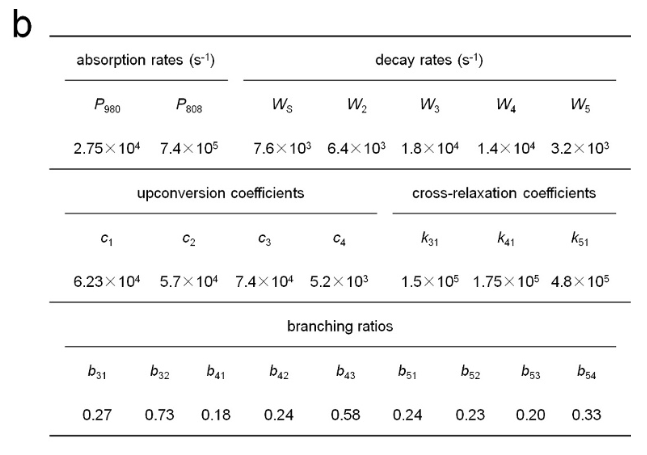

### Yb3+

### define which event to happen for point B

In [ ]:


weight_4 = {'p2':0.24 ,'p3_r': 0.35, 'p3_k': 0.41}

def choose_event(weights):
    rand_num = random.random()  # This gives a random number between 0 and 1
    print(rand_num)

    if 0 <= rand_num <= weights['p2']:
        return 'p2'
    elif weights['p2'] < rand_num <= weights['p2'] + weights['p3_r']:
        return 'p3_r'
    else:
        return 'p3_k'

# Test
event = choose_event(weight_4)
print(event)

0.11268758173710369
p2


In [ ]:
normalized_Yb_Tm

[[0.036875303250849104,
  0.3022804463852499,
  0.2765647743813683,
  0.35904900533721495,
  0.025230470645317808],
 [0.18633540372670807, 0.21739130434782608, 0.5962732919254659],
 [0.6321205588285577],
 [0.02892857142857143, 0.07821428571428571, 0.8928571428571429],
 [0.04296296296296296,
  0.017777777777777778,
  0.013333333333333334,
  0.9259259259259259],
 [0.002185430463576159,
  0.0013245033112582781,
  0.0015231788079470199,
  0.0015894039735099338,
  0.9933774834437086]]

In [ ]:
import random
import math
import matplotlib.pyplot as plt

def random_and_neighbors2(target_point, points):

    # every time we call this main function with inputing these two arguments, points should also be updated
    # Get the information using our previously defined function
    # we may define many subfunction for: 1st Yb, 1st Tm, 2nd Tm, 3rd Tm, 4th Tm
    # Define lifetime T and timestep t

    t=1 # time step, in the unit of 1 microsecond

    t1 = 100 # lifetime of Yb excited level, so the intrinsic decay rate w=1/t1(we have to consider the inherent relation)
    t3 = 90 # 1st Tm
    t4 = 80 # 2nd Tm
    t5 = 70 # 3rd Tm
    t6 = 60 # 4th Tm

    lifetime_Yb_Tm=[t1, t3, t4, t5, t6]

    # for excited point A or excited point B, we need to find its neighbors or itself.
    # subfunction

    # info = get_point_info(target_point, points)
    # neighbors_info=info[:]


    # for each input target point from qualified points, we only consider: 1st Yb, 1st Tm, 2nd Tm, 3rd Tm, 4th Tm

    #################################### 1st Yb
    if target_point[2]==1:

      normalized_p=normalized_Yb_Tm[0]
      # interaction with neighbors
      #weight_1 = {'pc':0,'p0':normalized_p[0],'p1':0,'p2':normalized_p[1],'p3':normalized_p[2],'p4':normalized_p[3],'p5':normalized_p[4]} # Nature: up conversion coefficients bigger than W

      rand_num = random.random()

      ### no decay
      if rand_num < math.exp(-1):
        print(f'{target_point} will stay in current step')


      ### make choice
      else:
        print(f'{rand_num} > {math.exp(-1)}')
        print(f'{target_point} won\'t stay in current step, and it would choose one choice: decay or upconversion, determined by next random number')

        info = get_point_info(target_point, points)

        neighbors_info=info[:] # include reference point and neighbors, later, because we should consider Ws: 7600 and other upconversion coefficients

        types = [neighbor[1]['type'] for neighbor in neighbors_info]
        coords = [neighbor[2]['coord'] for neighbor in neighbors_info]
        values = [neighbor[3]['value'] for neighbor in neighbors_info]
        tags = [list(neighbor[4].keys())[0] for neighbor in neighbors_info]
        tag_values = [list(neighbor[4].values())[0] for neighbor in neighbors_info]

        #p_stay_Yb1=math.exp(-t*(normalized_p[0]+normalized_p[1]+normalized_p[2]+normalized_p[3]+normalized_p[4]))

        #tag_values.append(Ws)
        # Sort the tag_values
        # all these lists are aligned according to the sorted order of tag_values

        sorted_indices = sorted(range(len(tag_values)), key=lambda k: tag_values[k]) #  a list of indices that represent the elements of tag_values in ascending order
        types = [types[i] for i in sorted_indices]
        coords = [coords[i] for i in sorted_indices]
        values = [values[i] for i in sorted_indices]
        tags = [tags[i] for i in sorted_indices]
        tag_values = [tag_values[i] for i in sorted_indices]


        P_total = sum(tag_values)
        normalized_tag_values = [p/P_total for p in tag_values]

        # Generate a random number for energy transfer event
        random_event = random.random()
        print(f"Random number for event: {random_event:.4f}")

        sorted_indices = sorted(range(len(normalized_tag_values)), key=lambda i: normalized_tag_values[i])

        # Create a ranked list of elements
        ranked_normalized_tag_values = [normalized_tag_values[i] for i in sorted_indices]

        # Determine which event occurs based on the normalized probabilities
        accumulated_prob = 0

        selected_type = None
        selected_coord = None
        selected_value = None
        selected_tag = None

        for i, value in enumerate(ranked_normalized_tag_values):
            accumulated_prob += value
            if random_event < accumulated_prob:
                #selected_event_index = i
                selected_type = types[i]
                selected_coord = coords[i]
                selected_value = values[i]
                selected_tag = tags[i]
                break

        target_neighbor=[selected_type, selected_coord, selected_value, selected_tag, tags[selected_tag]]

        ###### just decay to ground level

        if selected_type=='A':
          print(f'{target_point} won\'t stay in its original state, and there is no up conversion process but only decay to its ground level')
          target_point[2]-=1 # 1st excited Yb decay to ground level, type value from 1 to 0

          len1=len(qualified_points)
          # once the excited Yb decay to ground level, it won't involve in the following decay
          qualified_points.remove(target_point)
          len2=len(qualified_points)

          if len1-len2==1:
            print('Remove successfully')
          else:
            print('Remove error')

        ###### up-conversion process

        elif selected_type=='B':

          print(f'{target_point} won\'t stay in its original state, and it won\'t decay to its ground level, one up conversion would happen with one of its neighbor B')

          target_point[2]-=1 # 1st excited Yb decay to ground level, type value from 1 to 0

          if target_neighbor[2]==2: # ground level Tm, update its energy and append it to qualified points

            target_neighbor[2]+=1 # 1st excited Yb tranfer its energy to neighbor B , type value from i to i+1
            len1=len(qualified_points)
            qualified_points.append(target_neighbor)
            len2=len(qualified_points)

            if len2-len1==1:
              print('append successfully')
            else:
              print('append error')

          else: # if the energy of selected point B is 3, 4, 5, it's already in qualified points list, then just update its energy
            target_neighbor[2]+=1




   #################################### 1st Tm
    elif target_point[2]==3: # 1st Tm, value=3

      normalized_p=normalized_Yb_Tm[2]
      spontaneous_decay = normalized_p[0]
      #p_stay_Tm3=1-spontaneous_decay
      # for 1st Tm, decay or not
      tag_values=[spontaneous_decay]

      rand_num = random.random()

      if rand_num < math.exp(-1):
        print(f'{target_point} will stay in current step')

      else:
        print(f'{rand_num} > {math.exp(-1)}')
        print(f'{target_point} won\'t stay in current step, and it has two choice: decay or not(this is 1st excited Tm), determined by next random number')

        random_event = random.random()
        print(f"Random number for event: {random_event:.4f}")

        if random_event < tag_values[0]:
          print(f'{target_point} will decay to its ground level at current step')
          # 1st Tm, type=3, after decay, ground state, type=2,
          target_point[2]-=1

          len1=len(qualified_points)
          # once the excited Tm decay to ground level, it won't involve in the following decay
          qualified_points.remove(target_point)
          len2=len(qualified_points)
          if len1-len2==1:
            print('Remove successfully')
          else:
            print('Remove error')


    #################################### 2nd Tm
    elif target_point[2]==4: # 2nd Tm, value=4

      normalized_p=normalized_Yb_Tm[3]
      weight_4 = {'p2':normalized_p[0],'p3_r':normalized_p[1],'p3_k':normalized_p[2]}
      #p_stay_Tm4=math.exp(-t*(normalized_p[0]+normalized_p[1]+normalized_p[2]))
      #weight_4['stay']=p_stay_Tm4
      #which_event=choose_event(weight_4)
      rand_num = random.random()

      if rand_num < math.exp(-1):
        print(f'{target_point} will stay in current step')

      else:
        print(f'{rand_num} > {math.exp(-1)}')
        print(f'{target_point} won\'t stay in current step, and it would choose three choice: decay to 1st Tm, decay to ground Tm, cross-relaxation to 1st level Tm, determined by next random number')

        rand_num = random.random()
        print(f"Random number for event: {random_event:.4f}")

        if random_event < normalized_p[0]:
          print(f'{target_point} will decay from 2nd excited level to its ground level at current step')
          # 2nd Tm, value=4, 4-2=2, to ground level
          target_point[2]=target_point[2]-2

          len1=len(qualified_points)
          # once the excited Tm decay to ground level, it won't involve in the following decay
          qualified_points.remove(target_point)
          len2=len(qualified_points)
          if len1-len2==1:
            print('Remove successfully')
          else:
            print('Remove error')


        elif normalized_p[0] < random_event <= normalized_p[0]+normalized_p[1]:
          print(f'{target_point} will decay from 2nd excited level to 1st excited level at current step')
          # 2nd Tm, value=4, 4-1=3, to 1st excited level
          target_point[2]=target_point[2]-1

        else:
          print(f'{target_point} will cross-relaxation from 2nd excited level to 1st excited level at current step')
          # 2nd Tm, value=4, 4-1=3, to 1st excited level
          target_point[2]=target_point[2]-1


          # simultaneous, one ground level Tm change the type from 2 to 3
          ???????????

    #################################### 3rd Tm
    elif target_point[2]==5: # 3rd Tm, value=5
      normalized_p=normalized_Yb_Tm[4]
      weight_5 = {'p4_r':normalized_p[0],'p3':normalized_p[1],'p2':normalized_p[2],'p4_k':normalized_p[3]}
      #p_stay_Tm5 = math.exp(-t*(normalized_p[0]+normalized_p[1]+normalized_p[2]+normalized_p[3]))
      #which_event=choose_event(weight_5)

      rand_num = random.random()

      if rand_num < math.exp(-1):
        print(f'{target_point} will stay in current step')

      else:
        print(f'{rand_num} > {math.exp(-1)}')
        print(f'{target_point} won\'t stay in current step, and it would choose four choice: decay to ground level Tm, decay to 1st level Tm, decay to 2nd level Tm, cross-relaxation to 2nd level Tm, determined by next random number')

        rand_num = random.random()
        print(f"Random number for event: {random_event:.4f}")

        if random_event < normalized_p[2]:
          print(f'{target_point} will decay from 3rd excited level to its ground level at current step')
          # 3rd Tm, value=5, 5-3=2, to ground level
          target_point[2]=target_point[2]-3


        elif normalized_p[2] < random_event <= normalized_p[2]+normalized_p[1]:
          print(f'{target_point} will decay from 3rd excited level to 1st excited level at current step')
          # 3rd Tm, value=5, 5-2=3, to 1st excited level
          target_point[2]=target_point[2]-2

        elif normalized_p[2]+normalized_p[1] < random_event <= normalized_p[2]+normalized_p[1]+normalized_p[0]:
          print(f'{target_point} will decay from 3rd excited level to 2nd excited level at current step')
          # 3rd Tm, value=5, 5-1=4, to 2nd excited level
          target_point[2]=target_point[2]-1

        else:
          print(f'{target_point} will cross-relaxation from 3rd excited level to 2nd excited level at current step')
          # 3rd Tm, value=5, 5-1=4, to 2nd excited level
          target_point[2]=target_point[2]-1

          # simultaneous, one ground level Tm change the type from 2 to 4
          ???????????


    #################################### 4th Tm
    elif target_point[2]==6: # 4th Tm, value=6
      normalized_p=normalized_Yb_Tm[5]
      weight_6 = {'p5':normalized_p[0],'p4_r':normalized_p[1],'p3':normalized_p[2],'p2':normalized_p[3],'p4_k':normalized_p[4]}
      #p_stay_Tm6 = math.exp(-t*(normalized_p[0]+normalized_p[1]+normalized_p[2]+normalized_p[3]+normalized_p[4]))

      rand_num = random.random()

      if rand_num < math.exp(-1):
        print(f'{target_point} will stay in current step')

      else:
        print(f'{rand_num} > {math.exp(-1)}')
        print(f'{target_point} won\'t stay in current step, and it would choose five choice: decay to ground level Tm, decay to 1st level Tm, decay to 2nd level Tm,  decay to 3rd level Tm, cross-relaxation to 2nd level Tm, determined by next random number')

        rand_num = random.random()
        print(f"Random number for event: {random_event:.4f}")

        if random_event < normalized_p[1]:
          print(f'{target_point} will decay from 4th excited level to its 2nd excited level at current step')
          # 4th Tm, value=6, 6-2=4, to 2nd level
          target_point[2]=target_point[2]-2


        elif normalized_p[1] < random_event <= normalized_p[1]+normalized_p[2]:
          print(f'{target_point} will decay from 4th excited level to 1st excited level at current step')
          # 4th Tm, value=6, 6-3=3, to 1st excited level
          target_point[2]=target_point[2]-3

        elif normalized_p[2]+normalized_p[1] < random_event <= normalized_p[1]+normalized_p[2]+normalized_p[3]:
          print(f'{target_point} will decay from 4th excited level to ground level at current step')
          # 4th Tm, value=6, 6-4=2, to ground level
          target_point[2]=target_point[2]-4

        elif  normalized_p[1]+normalized_p[2]+normalized_p[3] < random_event <=  normalized_p[1]+normalized_p[2]+normalized_p[3]+normalized_p[0]:
          print(f'{target_point} will decay from 4th excited level to 3rd excited level at current step')
          # 4th Tm, value=6, 6-1=5, to 3rd excited level
          target_point[2]=target_point[2]-1

        else:
          print(f'{target_point} will cross-relaxation from 4th excited level to 2nd excited level at current step')
          # 4th Tm, value=6, 6-2=4, to 2nd excited level
          target_point[2]=target_point[2]-2

          # simultaneous, one ground level Tm change the type from 2 to 4
          ???????????





    # Extract the tag values and the corresponding tags from each neighbor sublist
    # in neighbor_info list, it also contains the reference point, because the excited level could be unchanged


    # Check which sub-interval the random number belongs to
    left_boundary = 0.0



    # Plotting-1
    plt.figure(figsize=(8, 2))
    plt.scatter(tag_values, [0] * len(tag_values), marker='o', color='blue', label='Tag Values')
    #plt.scatter([random_num], [0], marker='x', color='red', label='Random Number')

    # Adjustments to only show x-axis
    plt.yticks([])  # Hide y-axis
    plt.ylim(-0.1, 0.1)  # Limit y-axis so only x-axis is shown
    plt.xlim(0, 1)
    plt.xlabel('Value')
    plt.title('1D Representation of all neighbors tag values without normalization')
    plt.legend()
    plt.grid(True, axis='x')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)

    plt.show()


    # Plotting-2
    plt.figure(figsize=(8, 2))
    plt.scatter(normalized_tag_values, [0] * len(normalized_tag_values), marker='o', color='blue', label='Normalized Tag Values')
    plt.scatter([random_event], [0], marker='x', color='red', label='Random Number')

    # Adjustments to only show x-axis
    plt.yticks([])  # Hide y-axis
    plt.ylim(-0.1, 0.1)  # Limit y-axis so only x-axis is shown
    plt.xlim(0, 1)
    plt.xlabel('Value')
    plt.title('1D Representation of Tag Values and Random Number')
    plt.legend()
    plt.grid(True, axis='x')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)

    plt.show()

#################

    print('Reference',a[0])
    print('All neighbors tag value=',tag_values)
    print('Normalized Tag Values', normalized_tag_values)
    print('Ramdom number=',random_event)
    print(f'Interact with neighbor {target_neighbor}')

################ update the neighbor's value, tag, tag_value


    list_neighbor = list(target_neighbor)

    # Modify the value, for instance, increasing it by 1
    target_neighbor[2] += 1


    # Mapping of values, tag, and tag value
    value_to_tag_map = {
        1: ('p1', 0),
        2: ('p2', 0.14),
        3: ('p3', 0.13),
        4: ('p4', 0.12),
        5: ('p5', 0.11)
    }

    # Update tag and tag value
    if target_neighbor[2] in value_to_tag_map:
        new_tag, new_tag_value = value_to_tag_map[target_neighbor[2]]
        #print(new_tag_value)

        # Update target_neighbor
        target_neighbor[3] = new_tag  # Update the type to the new tag
        target_neighbor[4] = new_tag_value
        excited_state_A.append(target_neighbor)


    global track
    track=[]

    track.append(target_neighbor)
    print('track:', track)

    return track


In [ ]:
excited_state_A_i

[[9, ['A', (0.0, 0.0, 9.0), 1, {'p1': 0}]],
 [20, ['A', (0.0, 2.0, 0.0), 1, {'p1': 0}]],
 [67, ['A', (0.0, 6.0, 7.0), 1, {'p1': 0}]],
 [76, ['A', (0.0, 7.0, 6.0), 1, {'p1': 0}]],
 [85, ['A', (0.0, 8.0, 5.0), 1, {'p1': 0}]],
 [90, ['A', (0.0, 9.0, 0.0), 1, {'p1': 0}]],
 [93, ['A', (0.0, 9.0, 3.0), 1, {'p1': 0}]],
 [116, ['A', (1.0, 1.0, 6.0), 1, {'p1': 0}]],
 [117, ['A', (1.0, 1.0, 7.0), 1, {'p1': 0}]],
 [160, ['A', (1.0, 6.0, 0.0), 1, {'p1': 0}]],
 [169, ['A', (1.0, 6.0, 9.0), 1, {'p1': 0}]],
 [231, ['A', (2.0, 3.0, 1.0), 1, {'p1': 0}]],
 [354, ['A', (3.0, 5.0, 4.0), 1, {'p1': 0}]],
 [366, ['A', (3.0, 6.0, 6.0), 1, {'p1': 0}]],
 [406, ['A', (4.0, 0.0, 6.0), 1, {'p1': 0}]],
 [414, ['A', (4.0, 1.0, 4.0), 1, {'p1': 0}]],
 [440, ['A', (4.0, 4.0, 0.0), 1, {'p1': 0}]],
 [573, ['A', (5.0, 7.0, 3.0), 1, {'p1': 0}]],
 [621, ['A', (6.0, 2.0, 1.0), 1, {'p1': 0}]],
 [666, ['A', (6.0, 6.0, 6.0), 1, {'p1': 0}]],
 [730, ['A', (7.0, 3.0, 0.0), 1, {'p1': 0}]],
 [774, ['A', (7.0, 7.0, 4.0), 1, {'p1': 0}

In [ ]:
get_point_info(points[231], points)

OK


[['Point is inside the volume',
  {'type': 'A'},
  {'coord': (2.0, 3.0, 1.0)},
  {'value': 1},
  {'p1': 0}],
 ['Neighbor in positive x-direction',
  {'type': 'C'},
  {'coord': (3.0, 3.0, 1.0)},
  {'value': None},
  {'pc': 0}],
 ['Neighbor in negative x-direction',
  {'type': 'C'},
  {'coord': (1.0, 3.0, 1.0)},
  {'value': None},
  {'pc': 0}],
 ['Neighbor in positive y-direction',
  {'type': 'C'},
  {'coord': (2.0, 4.0, 1.0)},
  {'value': None},
  {'pc': 0}],
 ['Neighbor in negative y-direction',
  {'type': 'C'},
  {'coord': (2.0, 2.0, 1.0)},
  {'value': None},
  {'pc': 0}],
 ['Neighbor in positive z-direction',
  {'type': 'A'},
  {'coord': (2.0, 3.0, 2.0)},
  {'value': 0},
  {'p0': 0.036875303250849104}],
 ['Neighbor in negative z-direction',
  {'type': 'A'},
  {'coord': (2.0, 3.0, 0.0)},
  {'value': 0},
  {'p0': 0.036875303250849104}]]

In [ ]:
random_and_neighbors2(points[231], points)

OK
Spontaneous decay rate is 0.009950166250831893, because the random number is 0.678545711921247, so this excited level hasn't decayed yet at this step
This target point would have two options: non-radiative emission(upconversion, MPR, cross-relaxation), or stay in its original state, which is determined by the random number: 
Random number for event: 0.2853


NameError: ignored

In [ ]:
target_neighbor

In [ ]:
track

In [ ]:
excited_state_A

In [ ]:
len(excited_state_A)

### apply the process to all qualified points (A, B)

In [ ]:
for step in range(100):
  qualified_points=excited_state_A

  for target in qualified_points:
    random_and_neighbors2(target, points)
    print(qualified_points)




In [ ]:
len(excited_state_A)

In [ ]:
all_target_points=excited_state_A
all_target_points

### some questions

1.  decay v.s. transition